All numeric money variables are in thousand of US dollars

- Firm size measures:
    - Book value of the firm = (totalassets-totalliabilities)
    - Market value = (historical stock price * number of shares) = (originalprice * sharesoutstanding)
- Profit Margin:
    - Operating profit margin = operating profit / sales
        - Operating profit = (revenue-cogs - sgae - otheropexp)
        - Cogs = Cost of good sold = variable cost
        - sgae = sales and general administrative expenses = fixed costs
        - otheropexp = other operating expenses
        - Ebit = earnings before interest and taxes = operating profit
        - ebit = revenue - cogs - sgae - otheropexp
        - operating profit margin = opm = ebit/revenue
    - Profit margin = Net income / sales
        - Net income = ebit - incometax - finexp
        - Income tax = what the firm pays in taxes (for the government) (impuesto sobre la renta)
        - Finexp = financial expenses = what the firm pays in interest expenses for any loan that the firm issued
        

# Breve descripción del reto
Para este caso de negocios primero se realizará un analisis de los datos que recibimos con respecto a las finanzas de un serie de empresas.
Para después poder generar un modelo que nos ayude a predecir los retornos de un trimestre en el futuro. Se hará el modelo considerando distintas variables(más adelante se explicarán cuales) que describan el comportamiento de los retornos de las empresas

#### General Questions:

What is the composition of US public firms in terms of size, sales performance and profitability?

Why some firms are more profitable than others? Which factors/variables are related to profitability?

#### Considering the most recent financial quarter of the dataset:

For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [120]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
#columns = ["","","","","",""]
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")

df_firms

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-
...,...,...,...,...,...,...,...,...,...,...,...
3603,ZUO,"Zuora, Inc",3604,Com A,US,Stock,Information,NYSE,Software & Data,Software Publishers,-
3604,ZWS,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3605,ZY,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",3607,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [122]:
df_firms
df_firms['Sector NAICS\nlevel 1'].value_counts()

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

In [123]:
df_data.rename(columns = {'firm':'Ticker'}, inplace = True)
df_data

,Ticker,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000,1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021,2
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021,3
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021,4
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022,1


In [124]:
## merge
df_merged = pd.merge(df_data, df_firms, on="Ticker", how="left")

In [125]:
df_merged

,Ticker,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,"Agilent Technologies, Inc",94.0,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,"Zynerba Pharmaceuticals, Inc",3607.0,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [126]:
## take the date from string type to date type

df_merged['qdate'] = pd.PeriodIndex(df_merged['q'], freq="Q")
df_merged.set_index(['Ticker','qdate'],inplace=True)
df_merged.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind"], inplace=True)
df_merged

q    revenue       cogs          sgae  otheropexp  \
Ticker qdate                                                            
A      2000Q1  2000q1        NaN        NaN           NaN         NaN   
       2000Q2  2000q2  2485000.0  1261000.0  1.010000e+06         0.0   
       2000Q3  2000q3  2670000.0  1369000.0  1.091000e+06         0.0   
       2000Q4  2000q4  3372000.0  1732000.0  1.182000e+06         0.0   
       2001Q1  2001q1  2841000.0  1449000.0  1.113000e+06         0.0   
...               ...        ...        ...           ...         ...   
ZYNE   2021Q2  2021q2        0.0        0.0  9.838494e+03         0.0   
       2021Q3  2021q3        0.0        0.0  1.021065e+04         0.0   
       2021Q4  2021q4        0.0        0.0  8.836436e+03         0.0   
       2022Q1  2022q1        0.0        0.0  8.903915e+03         0.0   
       2022Q2  2022q2        0.0        0.0  9.168770e+03         0.0   

                extraincome  finexp  incometax  totalassets  totalliabilities  \
Ticker qdate                                                                    
A      2000Q1           NaN     NaN        NaN          NaN               NaN   
       2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
       2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
       2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
       2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                     ...     ...        ...          ...               ...   
ZYNE   2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
       2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
       2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
       2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
       2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

               ...  longdebt  stockholderequity   adjprice  originalprice  \
Ticker qdate   ...                                                          
A      2000Q1  ...       NaN                NaN  63.761670       104.0000   
       2000Q2  ...     0.000        4642000.000  45.215607        73.7500   
       2000Q3  ...     0.000        4902000.000  30.003238        48.9375   
       2000Q4  ...     0.000        5265000.000  33.566841        54.7500   
       2001Q1  ...     0.000        5541000.000  18.840347        30.7300   
...            ...       ...                ...        ...            ...   
ZYNE   2021Q2  ...   468.385          87699.257   5.290000         5.2900   
       2021Q3  ...   411.237          78686.999   4.240000         4.2400   
       2021Q4  ...   353.694          70913.334   2.880000         2.8800   
       2022Q1  ...   295.754          65166.970   2.050000         2.0500   
       2022Q2  ...   237.414          57241.873   1.140000         1.1400   

               sharesoutstanding  fiscalmonth  year  cto  \
Ticker qdate                                               
A      2000Q1         452000.000          NaN  2000    1   
       2000Q2         452271.967          6.0  2000    2   
       2000Q3         453014.579          9.0  2000    3   
       2000Q4         456366.381         12.0  2000    4   
       2001Q1         456769.737          3.0  2001    1   
...                          ...          ...   ...  ...   
ZYNE   2021Q2          41251.537          6.0  2021    2   
       2021Q3          41251.537          9.0  2021    3   
       2021Q4          41217.537         12.0  2021    4   
       2022Q1          42447.037          3.0  2022    1   
       2022Q2          43595.959          6.0  2022    2   

               Sector NAICS\nlevel 1 Sector\nEconomatica  
Ticker qdate                                              
A      2000Q1          Manufacturing   Electric Electron  
       2000Q2          Manufacturing   Electric Electron

In [127]:
import numpy as np
df_merged['lprice'] = df_merged.groupby(['Ticker'])['adjprice'].shift(4)
df_merged['r'] = np.log(df_merged['adjprice']) - np.log(df_merged['lprice'])


df_merged.loc['ADT':'ADTN',['adjprice','lprice','r']].iloc[85:96,]

adjprice     lprice         r
Ticker qdate                                 
ADT    2021Q2  10.587684   7.712379  0.316865
       2021Q3   7.973149   7.925644  0.005976
       2021Q4   8.324766   7.647039  0.084916
       2022Q1   7.548492   8.256476 -0.089650
       2022Q2   6.150000  10.587684 -0.543239
ADTN   2000Q1  20.305357        NaN       NaN
       2000Q2  20.454818        NaN       NaN
       2000Q3  14.535091        NaN       NaN
       2000Q4   7.259539        NaN       NaN
       2001Q1   8.391344  20.305357 -0.883684
       2001Q2   7.003320  20.454818 -1.071834

In [128]:
df_merged.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,lprice,r
count,1.586140e+05,1.583090e+05,1.583090e+05,1.583110e+05,1.586130e+05,1.586140e+05,1.586140e+05,1.598080e+05,1.598080e+05,1.296770e+05,1.595950e+05,1.597400e+05,1.591540e+05,159234.000000,1.578220e+05,159814.000000,324446.000000,324446.000000,1.448860e+05,144777.000000
mean,1.452993e+06,8.014647e+05,4.202786e+05,4.035049e+04,-1.461388e+04,2.041849e+04,4.149881e+04,1.667076e+07,1.315268e+07,4.289518e+05,2.959734e+06,3.518162e+06,3.887274e+03,142.157427,2.011844e+05,7.447652,2010.755429,2.477744,4.251850e+03,0.036950
std,5.403176e+06,3.747465e+06,1.740520e+06,7.671071e+05,5.487202e+05,1.128232e+05,3.310557e+05,1.027367e+08,9.195619e+07,4.603232e+06,1.495196e+07,1.417453e+07,3.523581e+05,4835.897299,6.922988e+05,3.345909,6.498747,1.117795,3.692909e+05,0.519699
min,-4.788351e+06,-4.460800e+06,-3.373000e+06,-6.967000e+06,-4.149100e+07,-3.439000e+06,-3.564500e+07,0.000000e+00,0.000000e+00,-1.500600e+04,0.000000e+00,-9.052000e+07,1.158507e-02,0.002700,0.000000e+00,0.000000,2000.000000,1.000000,1.158507e-02,-8.748305
25%,3.379850e+04,2.280000e+02,9.332000e+03,0.000000e+00,-2.140000e+03,0.000000e+00,0.000000e+00,3.664025e+05,1.407208e+05,0.000000e+00,7.000000e+03,1.237102e+05,9.910257e+00,11.160000,2.508096e+04,3.000000,2005.000000,1.000000,9.979387e+00,-0.156325
50%,2.051753e+05,4.382300e+04,5.636700e+04,0.000000e+00,0.000000e+00,7.950000e+02,2.493000e+03,1.711736e+06,9.899975e+05,6.452000e+03,2.550000e+05,5.681570e+05,2.085878e+01,25.800000,5.589535e+04,6.000000,2011.000000,2.000000,2.058000e+01,0.087462
75%,8.600000e+05,3.707180e+05,2.179200e+05,3.300000e+01,6.975720e+02,1.300000e+04,2.018475e+04,6.618525e+06,4.359462e+06,8.182700e+04,1.503724e+06,1.975248e+06,4.229000e+01,49.040000,1.442091e+05,9.000000,2016.000000,3.000000,4.106821e+01,0.291830
max,1.528710e+08,1.155220e+08,1.316620e+08,6.901800e+07,1.291970e+08,6.955000e+06,3.918600e+07,3.954687e+09,3.668788e+09,3.002790e+08,5.116530e+08,5.081410e+08,7.011719e+07,528921.000000,9.821405e+07,12.000000,2022.000000,4.000000,7.011719e+07,4.771155


In [129]:
aux = df_merged['q'] == '2022q2'
aux
df_merged2022q2 = df_merged[aux]
df_merged2022q2

,,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Sector NAICS\nlevel 1,Sector\nEconomatica,lprice,r
Ticker,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q2,2022q2,1607000.0,746000.0,5.010000e+05,0.0,-7000.00000,20000.000,59000.0,1.045500e+07,5.333000e+06,...,118.560000,118.7700,298708.056,6.0,2022,2,Manufacturing,Electric Electron,146.747733,-0.213296
AA,2022Q2,2022q2,3644000.0,2767000.0,2.200000e+05,-75000.0,81000.00000,30000.000,234000.0,1.570900e+07,8.417000e+06,...,45.487956,45.5800,184448.686,6.0,2022,2,Manufacturing,Basic & Fab Metal,36.582200,0.217886
AAIC,2022Q2,2022q2,10900.0,6374.0,0.000000e+00,0.0,-3417.00000,0.000,802.0,1.084755e+06,8.710570e+05,...,3.250000,3.2500,35016.392,6.0,2022,2,Finance and Insurance,Funds,4.060000,-0.222528
AAL,2022Q2,2022q2,13422000.0,0.0,1.240500e+07,0.0,25000.00000,439000.000,127000.0,6.796300e+07,7.638500e+07,...,12.680000,12.6800,649514.848,6.0,2022,2,Transportation and Warehousing,Transportat Serv,21.210000,-0.514447
AAME,2022Q2,2022q2,44669.0,0.0,4.678400e+04,0.0,0.00000,0.000,-436.0,3.792740e+05,2.701730e+05,...,2.670000,2.6700,20398.497,6.0,2022,2,Finance and Insurance,Finance and Insurance,4.296295,-0.475675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022Q2,2022q2,45542.0,28168.0,2.407400e+04,8043.0,3662.00000,0.000,9.0,1.127380e+05,2.553900e+04,...,2.810000,2.8100,67209.461,6.0,2022,2,Manufacturing,Food & Beverage,NaN,NaN
ZVO,2022Q2,2022q2,51380.0,34995.0,2.610800e+04,-8882.0,-3824.00000,0.000,8.0,8.543300e+04,7.882800e+04,...,0.970100,0.9701,34095.968,6.0,2022,2,Educational Services,Other,2.590000,-0.982014
ZWS,2022Q2,2022q2,284200.0,170400.0,6.000000e+04,300.0,-600.00000,5200.000,11300.0,1.176300e+06,9.469000e+05,...,27.179735,27.2400,125967.533,6.0,2022,2,Manufacturing,Industrial Machin,24.761709,0.093173


### Considering the most recent financial quarter of the dataset:

Show how many firms by industry there are in the sample

In [130]:
df_merged2022q2['Sector NAICS\nlevel 1'].value_counts()


Manufacturing                                                               1565
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

In [131]:
'''
PODEMOS NOTAR QUE LA MAYOR CANTIDAD DE FIRMAS SE CONCENRTA EN LA INDUSTRIA 'MANUFACTURING', SIENDO QUE 1565 FIRMAS SE DEDICAN A DICHO SECTOR
'''


"\nPODEMOS NOTAR QUE LA MAYOR CANTIDAD DE FIRMAS SE CONCENRTA EN LA INDUSTRIA 'MANUFACTURING', SIENDO QUE 1565 FIRMAS SE DEDICAN A DICHO SECTOR\n"

For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

Mediana: 458532.0


,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.000,5704446.00,5704446.0
Accommodation and Food Services,68.0,5.139213e+05,2.456108e+06,-8658900.0,1.828125e+04,243717.500,989514.25,7289000.0
Administrative and Support and Waste Management and Remediation Services,124.0,2.819477e+06,7.323975e+06,-1715647.0,9.187999e+04,566167.000,2048337.50,46515000.0
"Agriculture, Forestry, Fishing and Hunting",15.0,3.629560e+06,6.806214e+06,14751.0,2.473960e+05,1104345.000,3283850.00,26071000.0
"Arts, Entertainment, and Recreation",19.0,5.394410e+06,2.206931e+07,-1081020.0,-1.253620e+05,67242.769,468964.00,96433000.0
Construction,44.0,2.535521e+06,4.271095e+06,83162.0,4.109848e+05,998146.500,2585043.50,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.000,966118.00,4322243.0
Finance and Insurance,663.0,5.482677e+06,2.071494e+07,-5438611.0,2.961440e+05,1049158.000,3446231.50,286143000.0
Health Care and Social Assistance,59.0,1.080145e+06,1.919774e+06,-1656000.0,1.071690e+05,451385.000,1202843.50,10400700.0


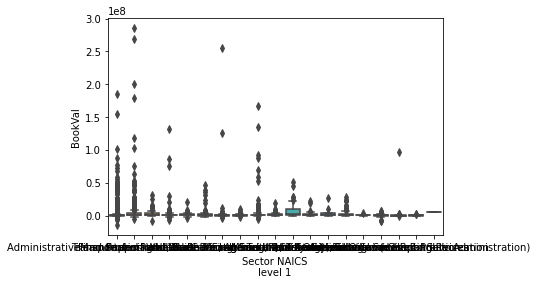

In [132]:
df_merged2022q2['BookVal'] = df_merged2022q2['totalassets'] - df_merged2022q2['totalliabilities']

sns.boxplot(x='Sector NAICS\nlevel 1', y='BookVal', data=df_merged2022q2)
print("Mediana: " + str(df_merged2022q2['BookVal'].median()))
df_merged2022q2.groupby('Sector NAICS\nlevel 1')['BookVal'].describe()


In [133]:
'''
EL BOOK VALUE LO PODEMOS OBTENER RESTANDO LOS ACTIVOS DE LA INDUSTRIA MENOS LOS PASIVOS EN LA MISMA
ES DECIR QUE ESTE VALOR REPRESENTA SU VALOR TOTAL ACTUAL CONSIDERANDO LAS DEUDAS Y PAGOS QUE TENGA QUE CUBRIR

NOTEMOS QUE EL VALOR TIPICO DE BOOK VALUE ENTRE LAS INDUSTRIAS ES DE 458,532 MILES DE DOLARES (CERCA DE 458 MILLONES DE DOLARES).
PODEMOS COMPARAR DICHO NUMERO CON EL 50 PERCENTIL(VALOR TIPICO) DE LA INDUSTRIA CON MAYOR BOOKVALUE, LA CUAL ES 
'Utilities' CON UN VALOR DE 2,791,950 MILES DE DOLARES (CERCA DE 3 MIL MILLONES DE DOLARES DICHO EN ESPAÑOL)

POR OTRO LADO, LA INDUSTRIA CON UN VALOR TIPICO MENOR EN EL BOOKVALUE  ES  CON UN VALOR TÍPICO DE 67242.769, ES DECIR
67,242,769 DE DÓLARES

CON ESTA COMPARACION PODEMOS DECIR QUE TANTO EL VALOR MAXIMO COMO EL VALOR MÍNIMO ESTÁN MUY DESVIADOS DEL VALOR TIPICO DENTRO DE LA LISTA DE DATOS
'''

"\nEL BOOK VALUE LO PODEMOS OBTENER RESTANDO LOS ACTIVOS DE LA INDUSTRIA MENOS LOS PASIVOS EN LA MISMA\nES DECIR QUE ESTE VALOR REPRESENTA SU VALOR TOTAL ACTUAL CONSIDERANDO LAS DEUDAS Y PAGOS QUE TENGA QUE CUBRIR\n\nNOTEMOS QUE EL VALOR TIPICO DE BOOK VALUE ENTRE LAS INDUSTRIAS ES DE 458,532 MILES DE DOLARES (CERCA DE 458 MILLONES DE DOLARES).\nPODEMOS COMPARAR DICHO NUMERO CON EL 50 PERCENTIL(VALOR TIPICO) DE LA INDUSTRIA CON MAYOR BOOKVALUE, LA CUAL ES \n'Utilities' CON UN VALOR DE 2,791,950 MILES DE DOLARES (CERCA DE 3 MIL MILLONES DE DOLARES DICHO EN ESPAÑOL)\n\nPOR OTRO LADO, LA INDUSTRIA CON UN VALOR TIPICO MENOR EN EL BOOKVALUE  ES  CON UN VALOR TÍPICO DE 67242.769, ES DECIR\n67,242,769 DE DÓLARES\n\nCON ESTA COMPARACION PODEMOS DECIR QUE TANTO EL VALOR MAXIMO COMO EL VALOR MÍNIMO ESTÁN MUY DESVIADOS DEL VALOR TIPICO DENTRO DE LA LISTA DE DATOS\n"

1106556.4629300002


,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.681070e+06,2.507255e+07,1.104731e+04,2.792043e+05,1.394617e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,131.0,1.385569e+07,4.476903e+07,6.078575e+03,5.250301e+05,1.938284e+06,6.110297e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.046780e+06,1.457197e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.278260e+07,3.685083e+07,7.425361e+03,1.146178e+06,2.504698e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.857422e+06,5.646435e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,690.0,8.412277e+06,2.920083e+07,5.430963e+03,3.625936e+05,1.264517e+06,5.020255e+06,4.818731e+08
Health Care and Social Assistance,63.0,3.507730e+06,7.028577e+06,6.955542e+03,1.493333e+05,1.338427e+06,4.472025e+06,4.965911e+07


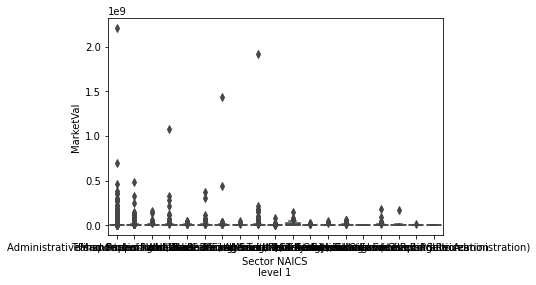

In [134]:
df_merged2022q2['MarketVal'] = df_merged2022q2['originalprice'] * df_merged2022q2['sharesoutstanding']
sns.boxplot(x='Sector NAICS\nlevel 1', y='MarketVal', data=df_merged2022q2)
print(df_merged2022q2['MarketVal'].median())
df_merged2022q2.groupby('Sector NAICS\nlevel 1')['MarketVal'].describe()

In [135]:
''' 
El market value nos dice el valor de la empresa en el mercado, es decir, cuanto valdría la empresa si se comprara en el momento. En esta variable tambien
influye la perpectiva del mercado, es decir que si una empresa gana popularidad por la calidad de sus productos o servicios es posible que su market value
crezca sin que su book value lo haga, por lo que esperamos que el market value siempre sea mayor al bookvalue.

Una vez que comparamos los valores de las indsutrias podemos notar que en efecto los valores de marketvalue son mayores a los valores del book value de las industrias

'''

' \nEl market value nos dice el valor de la empresa en el mercado, es decir, cuanto valdría la empresa si se comprara en el momento. En esta variable tambien\ninfluye la perpectiva del mercado, es decir que si una empresa gana popularidad por la calidad de sus productos o servicios es posible que su market value\ncrezca sin que su book value lo haga, por lo que esperamos que el market value siempre sea mayor al bookvalue.\n\nUna vez que comparamos los valores de las indsutrias podemos notar que en efecto los valores de marketvalue son mayores a los valores del book value de las industrias\n\n'

For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [136]:
df_merged2022q2['ebit'] = df_merged2022q2['revenue'] - df_merged2022q2['cogs'] - df_merged2022q2['sgae'] - df_merged2022q2['otheropexp']

In [137]:
df_merged2022q2['NetIncome'] = df_merged2022q2['ebit'] - df_merged2022q2['finexp'] - df_merged2022q2['incometax'] + df_merged2022q2['extraincome']

df_merged2022q2['ProfMar'] = df_merged2022q2['NetIncome'] / df_merged2022q2['revenue']
df_merged2022q2.groupby('Sector NAICS\nlevel 1')['ProfMar'].describe()

### sacar la mediana general y comparar con el mas alto y mas bajo

,count,mean,std,min,25%,50%,75%,max
Sector NAICS level 1,,,,,,,,
-,1.0,0.457850,NaN,0.457850,0.457850,0.457850,0.457850,0.457850
Accommodation and Food Services,67.0,0.010241,0.264335,-1.508883,-0.001980,0.051732,0.122229,0.546401
Administrative and Support and Waste Management and Remediation Services,124.0,-0.158377,1.430017,-15.036858,-0.031459,0.040445,0.109016,0.612446
"Agriculture, Forestry, Fishing and Hunting",15.0,-0.028357,0.287370,-0.979005,0.004027,0.033390,0.107970,0.185485
"Arts, Entertainment, and Recreation",19.0,-0.035906,0.546643,-2.037859,0.031007,0.098742,0.160037,0.582489
Construction,44.0,0.273472,1.302566,-0.438356,0.026429,0.081419,0.138511,8.685034
Educational Services,14.0,-0.036173,0.220928,-0.735449,-0.054122,0.015267,0.060190,0.153664
Finance and Insurance,663.0,NaN,NaN,-inf,0.075432,0.258436,0.376087,inf
Health Care and Social Assistance,59.0,-inf,NaN,-inf,-0.366534,-0.047305,0.048423,0.125085


<AxesSubplot:xlabel='Sector NAICS\nlevel 1', ylabel='ProfMar'>

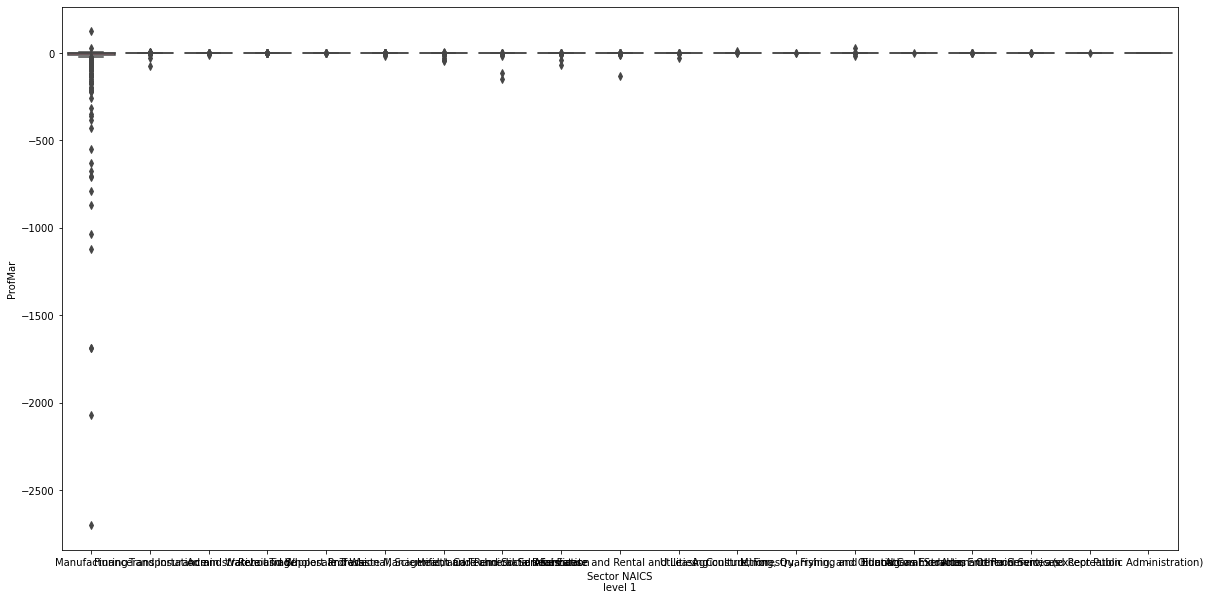

In [138]:


plt.figure(figsize=(20,10))
sns.boxplot(x='Sector NAICS\nlevel 1', y='ProfMar', data=df_merged2022q2)

In [139]:

'''
Apple es la empresa con el mayor Market Value a pesar de que no este entre los mejores book value,
esto se puede deber al valor agregado por el mercado, es decir el estatus de la marca,
la calidad del servicio que brindan, y que sus productos son muy buscados
'''

df_merged2022q2['MarketVal'].sort_values(ascending=False).head(10)

## es el valor de mecardo de la empresa en este trimestre. 

Ticker  qdate 
AAPL    2022Q2    2.212838e+09
MSFT    2022Q2    1.920840e+09
GOOGL   2022Q2    1.435042e+09
AMZN    2022Q2    1.080624e+09
TSLA    2022Q2    6.976698e+08
BRK_A   2022Q2    6.015139e+08
UNH     2022Q2    4.818731e+08
JNJ     2022Q2    4.671001e+08
META    2022Q2    4.363946e+08
NVDA    2022Q2    3.789750e+08
Name: MarketVal, dtype: float64

In [140]:

'''
Estas son ls 10 firmas con los mejores book values,
este valor hace referencia al valor total de la empresa
sin considerar la perspectiva del mercado, es decir la resta de lo
que la empresa posee menos lo que debe
'''
df_merged2022q2['BookVal'].sort_values(ascending=False).head(10) 

Ticker  qdate 
BRK_A   2022Q2    461229000.0
JPM     2022Q2    286143000.0
BAC     2022Q2    269118000.0
GOOGL   2022Q2    255419000.0
C       2022Q2    199626000.0
XOM     2022Q2    184508000.0
WFC     2022Q2    179793000.0
MSFT    2022Q2    166542000.0
CVX     2022Q2    154562000.0
T       2022Q2    135307000.0
Name: BookVal, dtype: float64

How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [141]:
''' 
una manera de medir la rentabilidad de una firma es calculando el retorno sobre activos (ROA),
lo cual nos dice la relación entre el ingreso neto y el total de activos. Es decir, son las ganancias después de 
impuestos

el profit margin ES UNA RELACIÓN DE RENTABILIDAD, este margen INDICA EL PORCENTAJE AL QUE UNA EMPRESA GANA DINERO CON LOS INGRESOS.

el book to market value INDICA SI UNA EMPRESA TIENE UNA ACCIÓN CARA O UNA ACCIÓN BARATA SEGÚN EL VALOR DE LA RELACIÓN
'''

' \nuna manera de medir la rentabilidad de una firma es calculando el retorno sobre activos (ROA),\nlo cual nos dice la relación entre el ingreso neto y el total de activos. Es decir, son las ganancias después de \nimpuestos\n\nel profit margin ES UNA RELACIÓN DE RENTABILIDAD, este margen INDICA EL PORCENTAJE AL QUE UNA EMPRESA GANA DINERO CON LOS INGRESOS.\n\nel book to market value INDICA SI UNA EMPRESA TIENE UNA ACCIÓN CARA O UNA ACCIÓN BARATA SEGÚN EL VALOR DE LA RELACIÓN\n'

In [142]:
df_merged['BookVal'] = df_merged['totalassets'] - df_merged['totalliabilities']
df_merged['MarketVal'] = df_merged['originalprice'] * df_merged['sharesoutstanding']
df_merged['ebit'] = df_merged['revenue'] - df_merged['cogs'] - df_merged['sgae'] - df_merged['otheropexp']
df_merged['NetIncome'] = df_merged['ebit'] - df_merged['finexp'] - df_merged['incometax'] + df_merged['extraincome']

df_merged['ROA'] = df_merged['NetIncome'] / df_merged['totalassets']
df_merged['ProfMar'] = df_merged['NetIncome'] / df_merged['revenue']
df_merged['B2M_value'] = df_merged['BookVal']/df_merged['MarketVal']

df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

print(df_merged['ROA'].describe())
print(df_merged['ProfMar'].describe())
print(df_merged['B2M_value'].describe())

count    158305.000000
mean          0.396530
std         197.444974
min      -13594.000000
25%          -0.004056
50%           0.005769
75%           0.017915
max       77290.000000
Name: ROA, dtype: float64
count    151933.000000
mean         -7.764307
std         392.858327
min     -101403.241417
25%          -0.007776
50%           0.057970
75%           0.144389
max       48191.000000
Name: ProfMar, dtype: float64
count    1.531670e+05
mean     8.130672e+01
std      3.129804e+04
min     -2.873941e+02
25%      2.295224e-01
50%      4.455809e-01
75%      7.587253e-01
max      1.224872e+07
Name: B2M_value, dtype: float64


Calculate and explain earnings per share deflated by price.

In [143]:
df_merged['EPSP'] = df_merged['NetIncome'] / df_merged['sharesoutstanding']

''' 
es la parte de las ganancias de una empresa que 
se asigna a cada acción individual de las acciones, es decir 
que define cuánto beneficio puede obtener cada acción(cada accionista)
'''

' \nes la parte de las ganancias de una empresa que \nse asigna a cada acción individual de las acciones, es decir \nque define cuánto beneficio puede obtener cada acción(cada accionista)\n'

## About statistical modeling


Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

In [144]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [145]:
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")
df_firms.rename(columns = {'Ticker':'firm'}, inplace = True)
df_merged = pd.merge(df_data, df_firms, on="firm", how="left")
df_merged['qdate'] = pd.PeriodIndex(df_merged['q'], freq="Q")
df_merged.set_index(['firm','qdate'],inplace=True)
df_merged.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind",'stockholderequity','Sector\nEconomatica'], inplace=True)

In [146]:
df_merged['BookVal'] = df_merged['totalassets'] - df_merged['totalliabilities']
df_merged['MarketVal'] = df_merged['originalprice'] * df_merged['sharesoutstanding']
df_merged['ebit'] = df_merged['revenue'] - df_merged['cogs'] - df_merged['sgae'] - df_merged['otheropexp']
df_merged['NetIncome'] = df_merged['ebit'] - df_merged['finexp'] - df_merged['incometax'] + df_merged['extraincome']

df_merged['ProfMar'] = df_merged['NetIncome'] / df_merged['revenue']



In [147]:
df_merged['EPS'] = df_merged['NetIncome'] / df_merged['sharesoutstanding']
df_merged['EPSP'] = df_merged['EPS'] / df_merged['originalprice']
df_merged['shrt_fin_lev'] = df_merged['shortdebt'] / df_merged['totalassets']
df_merged['lng_fin_lev'] = df_merged['longdebt'] / df_merged['totalassets']
df_merged['op_profit_mrgn'] = df_merged['ebit'] / df_merged['revenue']

df_merged.replace([np.inf, -np.inf], np.nan, inplace=True) # de esta manera podemos quitar los infinitos causados por divisiones entre cero

In [148]:
df_merged['EPS']

firm  qdate 
A     2000Q1         NaN
      2000Q2    0.367036
      2000Q3    0.342152
      2000Q4    0.668323
      2001Q1    0.337150
                  ...   
ZYNE  2021Q2   -0.241205
      2021Q3   -0.256530
      2021Q4   -0.213867
      2022Q1   -0.200029
      2022Q2   -0.226007
Name: EPS, Length: 324446, dtype: float64

In [149]:
''' 
Variables escogidas:

- Short financial leverage: Hace referencia al capital prestado que la empresa usa para generar rendimientos. Elegí esta variable porque considero que es importante cuanto
                            del total de capital manejado por la empresa es capital prestado y que seguramente esto influye sobre los retornos trimestrales de cada sector
- Long financial leverage: Es parecida a la variable anterior pero a largo plazo. 
- Operating profit margin: Es la relación entre el ingreso operativo de la empresa y los ingresos totales de la empresa. Creo que esta variable podría ser de importancia 
                            dentro del modelo que generaré para predecir los retornos del siguiente trimestre, ya que nos dice un poco sobre la rentabilidad de la 
                            empresa/industria/sector
'''

' \nVariables escogidas:\n\n- Short financial leverage: Hace referencia al capital prestado que la empresa usa para generar rendimientos. Elegí esta variable porque considero que es importante cuanto\n                            del total de capital manejado por la empresa es capital prestado y que seguramente esto influye sobre los retornos trimestrales de cada sector\n- Long financial leverage: Es parecida a la variable anterior pero a largo plazo. \n- Operating profit margin: Es la relación entre el ingreso operativo de la empresa y los ingresos totales de la empresa. Creo que esta variable podría ser de importancia \n                            dentro del modelo que generaré para predecir los retornos del siguiente trimestre, ya que nos dice un poco sobre la rentabilidad de la \n                            empresa/industria/sector\n'

Do histograms for each factor/variables and interpret them

Do plots to visualize the possible relationship each factor might have with the dependent variable.

Show descriptive statistics of these factors

In [150]:
df_merged['Sector NAICS\nlevel 1'].value_counts()

df_merged[df_merged['Sector NAICS\nlevel 1'] == 'Finance and Insurance']


df_new = df_merged[df_merged['Sector NAICS\nlevel 1'].isin(['Finance and Insurance', 'Real Estate and Rental and Leasing'])]


df_new

q   revenue     cogs  sgae  otheropexp  extraincome  finexp  \
firm qdate                                                                      
AAIC 2000Q1  2000q1       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q2  2000q2       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q3  2000q3       NaN      NaN   NaN         NaN          NaN     NaN   
     2000Q4  2000q4       NaN      NaN   NaN         NaN          NaN     NaN   
     2001Q1  2001q1       NaN      NaN   NaN         NaN          NaN     NaN   
...             ...       ...      ...   ...         ...          ...     ...   
ZION 2021Q2  2021q2  570000.0  15000.0   0.0         0.0    -100000.0     0.0   
     2021Q3  2021q3  569000.0  14000.0   0.0         0.0    -244000.0     0.0   
     2021Q4  2021q4  566000.0  13000.0   0.0         0.0    -284000.0     0.0   
     2022Q1  2022q1  555000.0  11000.0   0.0         0.0    -289000.0     0.0   
     2022Q2  2022q2  608000.0  15000.0   0.0         0.0    -333000.0     0.0   

             incometax  totalassets  totalliabilities  ...    BookVal  \
firm qdate                                             ...              
AAIC 2000Q1        NaN          NaN               NaN  ...        NaN   
     2000Q2        NaN          NaN               NaN  ...        NaN   
     2000Q3        NaN          NaN               NaN  ...        NaN   
     2000Q4        NaN          NaN               NaN  ...        NaN   
     2001Q1        NaN          NaN               NaN  ...        NaN   
...                ...          ...               ...  ...        ...   
ZION 2021Q2   101000.0   87208000.0        79175000.0  ...  8033000.0   
     2021Q3    71000.0   88306000.0        80532000.0  ...  7774000.0   
     2021Q4    56000.0   93200000.0        85737000.0  ...  7463000.0   
     2022Q1    52000.0   91126000.0        84832000.0  ...  6294000.0   
     2022Q2    57000.0   87784000.0        82152000.0  ...  5632000.0   

                MarketVal      ebit  NetIncome   ProfMar       EPS      EPSP  \
firm qdate                                                                     
AAIC 2000Q1           NaN       NaN        NaN       NaN       NaN       NaN   
     2000Q2           NaN       NaN        NaN       NaN       NaN       NaN   
     2000Q3           NaN       NaN        NaN       NaN       NaN       NaN   
     2000Q4           NaN       NaN        NaN       NaN       NaN       NaN   
     2001Q1           NaN       NaN        NaN       NaN       NaN       NaN   
...                   ...       ...        ...       ...       ...       ...   
ZION 2021Q2  8.659293e+06  555000.0   354000.0  0.621053  2.160966  0.040881   
     2021Q3  1.003054e+07  555000.0   240000.0  0.421793  1.480837  0.023927   
     2021Q4  9.882232e+06  553000.0   213000.0  0.376325  1.361340  0.021554   
     2022Q1  9.937213e+06  544000.0   203000.0  0.365766  1.339277  0.020428   
     2022Q2  7.704160e+06  593000.0   203000.0  0.333882  1.341184  0.026349   

             shrt_fin_lev lng_fin_lev  op_profit_mrgn  
firm qdate                                             
AAIC 2000Q1           NaN         NaN             NaN  
     2000Q2           NaN         NaN             NaN  
     2000Q3           NaN         NaN             NaN  
     2000Q4           NaN         NaN             NaN  
     2001Q1           NaN         NaN             NaN  
...                   ...         ...             ...  
ZION 2021Q2           NaN    0.014999        0.973684  
     2021Q3           NaN    0.011551        0.975395  
     2021Q4           NaN    0.010858        0.977032  
     2022Q1           NaN    0.007561        0.980180  
     2022Q2           NaN    0.007644        0.975329  

[69123 rows x 29 columns]

count    8393.000000
mean        0.061086
std         0.298713
min         0.000000
25%         0.000000
50%         0.004291
75%         0.034598
max        10.584722
Name: shrt_fin_lev_w, dtype: float64

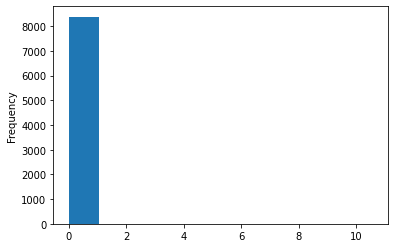

In [151]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)



df_new['shrt_fin_lev_w'] = winsorize(df_new['shrt_fin_lev'], limits=[0.0001, 0.06])

df_new['shrt_fin_lev_w'].plot.hist()
df_new['shrt_fin_lev_w'].describe()

count    37841.000000
mean         0.206884
std          0.238992
min          0.000000
25%          0.023432
50%          0.089712
75%          0.389809
max          2.972546
Name: lng_fin_lev, dtype: float64

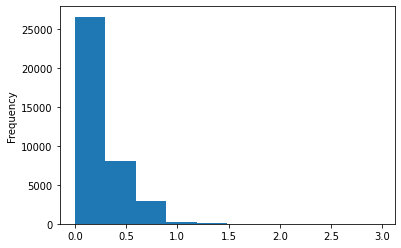

In [152]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True) 


df_new['lng_fin_lev'] = winsorize(df_new['lng_fin_lev'], limits=[0.02, 0.02])

df_new['lng_fin_lev'].plot.hist()
df_new['lng_fin_lev'].describe()

count    37405.000000
mean         0.497941
std          3.198229
min         -0.195051
25%          0.158395
50%          0.438331
75%          0.829208
max        588.077670
Name: op_profit_mrgn, dtype: float64

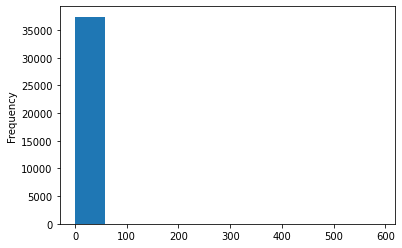

In [153]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True) 


df_new['op_profit_mrgn'] = winsorize(df_new['op_profit_mrgn'], limits=[0.02, 0.02])

df_new['op_profit_mrgn'].plot.hist()
df_new['op_profit_mrgn'].describe()

Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [154]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#df_new["R"] = (df_new["originalprice"] / df_new["originalprice"].shift(1)) #-1 log y shift de 4 (retornos anuales)
df_new['R'] = np.log(df_new['adjprice']) - np.log(df_new['adjprice'].shift(4))

df_new['R'].describe()

count    35123.000000
mean         0.067814
std          0.448968
min         -6.134266
25%         -0.075441
50%          0.101364
75%          0.267369
max          5.729708
Name: R, dtype: float64

In [155]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') -1
    return r/r.max() *100

df_new = df_new.dropna()
df_new['percentile']=df_new.groupby('q')['MarketVal'].apply(dense_inclusive_pct).astype(int)
df_new['small'] = df_new['percentile'] <= 33
df_new['small'] = df_new['small'].astype(int)

df_new['medium'] = (df_new['percentile'] <= 66) & (df_new['percentile']>33)
df_new['medium'] = df_new['medium'].astype(int)


In [156]:
df_new = df_new.dropna()
df_new.isna().sum()


df_new['f1r'] = df_new['R'].shift(-1)

#df_new.replace([np.nan, np.nan], 0, inplace=True) 
df_new = df_new.dropna()

X = df_new[['EPSP','shrt_fin_lev', 'lng_fin_lev','op_profit_mrgn','small','medium']]#.dropna()
y = df_new['f1r']#.dropna()

print(X.shape)
print(y.shape)


(7357, 6)
(7357,)


In [157]:
regr = linear_model.LinearRegression()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

regr.fit(Xtrain, ytrain)

LinearRegression()

In [158]:
pred_y = regr.predict(Xtest)

acc = r2_score( ytest,pred_y)
acc

0.00436644597340996

In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


x = sm.add_constant(X)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    f1r   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     33.90
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.34e-40
Time:                        15:30:55   Log-Likelihood:                -5533.3
No. Observations:                7357   AIC:                         1.108e+04
Df Residuals:                    7350   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1381      0.013     10.

In [160]:
'''
El modelo corrido obtuvo un valor de r cuadrada de 2.7% lo cual nos dice que no se están prediciendo los retornos del siguiente trimestre de manera tan precisa

En cuanto a la significancia de las variables independientes en el modelo:
    - EPSP: está a 10.6 desviaciones estandar del cero, lo que nos deja con un P-value de 0, por lo que podemos decir que la variable de earnings per share es
            bastante significativa dentro del modelo para predecir los retornos del siguiente trimestre. Cuenta con un coeficiente de 0.4
            es decir que por cada unidad de cambio en esta variable independiente, hay un cambio de 0.4 en la variable dependiente
    - SHORT FINANCE LEVERAGE: Está a 4.22 desviaciones estandar del cero, lo que nos deja con un p-value de 0, por lo que podemos decir que la variable en cuestión 
                        tiene alta significancia dentro del modelo generado. Cuenta con un coeficiente de -0.23
                        es decir que por cada unidad de cambio en esta variable independiente, hay un cambio de -0.23 en la variable dependiente
    - LONG FINANCE LEVERAGE: Está a 1.7 desviaciones estandar del cero, lo que nos deja con un p-value de 0.07 y debido a que dicho valor es mayor a 0.05 se concluye 
                                que esta variable es representativa dentro del modelo. Cuenta con un coeficiente de -0.4
                                es decir que por cada unidad de cambio en esta variable independiente, hay un cambio de -0.4 en la variable dependiente
    - operating profit margin: Está a 1.5 desviaciones estandar y tiene un p-value de 0.113, y por esto se puede concluir que no tiene significancia dentro del modelo
                                de predicciones. Cuenta con un coeficiente de 0.004
                                es decir que por cada unidad de cambio en esta variable independiente, hay un cambio de 0.004 en la variable dependiente, o sea 
                                que casi no hay afectacion


Con este análisis en mente, voy a remover del modelo las 2 variables que tienen menos significancia para ver qué cambios hay en las predicciones del modelo
'''

'\nEl modelo corrido obtuvo un valor de r cuadrada de 2.7% lo cual nos dice que no se están prediciendo los retornos del siguiente trimestre de manera tan precisa\n\nEn cuanto a la significancia de las variables independientes en el modelo:\n    - EPSP: está a 10.6 desviaciones estandar del cero, lo que nos deja con un P-value de 0, por lo que podemos decir que la variable de earnings per share es\n            bastante significativa dentro del modelo para predecir los retornos del siguiente trimestre\n    - SHORT FINANCE LEVERAGE: Está a 4.22 desviaciones estandar del cero, lo que nos deja con un p-value de 0, por lo que podemos decir que la variable en cuestión \n                        tiene alta significancia dentro del modelo generado\n    - LONG FINANCE LEVERAGE: Está a 1.7 desviaciones estandar del cero, lo que nos deja con un p-value de 0.07 y debido a que dicho valor es mayor a 0.05 se concluye \n                                que esta variable es representativa dentro del mod

In [161]:
X

EPSP  shrt_fin_lev  lng_fin_lev  op_profit_mrgn  small  \
firm qdate                                                                
AC   2016Q4  0.004381      0.000000     0.000000        0.008101      0   
     2017Q1 -0.014918      0.000000     0.000000       -0.195051      0   
     2017Q2  0.005664      0.000000     0.000000       -0.195051      0   
     2017Q3  0.001783      0.000000     0.000000       -0.195051      0   
     2017Q4  0.019549      0.000000     0.000000       -0.195051      1   
...               ...           ...          ...             ...    ...   
XELB 2021Q1 -0.066451      0.036342     0.183303       -0.195051      1   
     2021Q2 -0.026961      0.042631     0.213883       -0.159513      1   
     2021Q3 -0.039018      0.048116     0.209812       -0.115975      1   
     2021Q4 -0.325670      0.029472     0.260636       -0.195051      1   
     2022Q1 -0.119578      0.028656     0.258356       -0.195051      1   

             medium  
firm qdate           
AC   2016Q4       1  
     2017Q1       1  
     2017Q2       1  
     2017Q3       1  
     2017Q4       0  
...             ...  
XELB 2021Q1       0  
     2021Q2       0  
     2021Q3       0  
     2021Q4       0  
     2022Q1       0  

[7357 rows x 6 columns]

In [162]:
X = X.drop(columns=['lng_fin_lev','op_profit_mrgn'])
x = sm.add_constant(X)

results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    f1r   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     50.04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.30e-41
Time:                        15:30:55   Log-Likelihood:                -5534.9
No. Observations:                7357   AIC:                         1.108e+04
Df Residuals:                    7352   BIC:                         1.111e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1264      0.011     11.950   

You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = df_new[["f1r","EPSP",'shrt_fin_lev', 'lng_fin_lev','op_profit_mrgn']]

vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)


          feature       VIF
0             f1r  1.026373
1            EPSP  1.022572
2    shrt_fin_lev  1.032123
3     lng_fin_lev  1.044951
4  op_profit_mrgn  1.001518


In [164]:
'''
CONSIDERANDO 5 COMO NUMERO UMBRAL PARA DEFINIR SI ELIMINAMOS ALGUNA VARIABLE NOTAMOS QUE NO HAY NINGUNA VARIABLE INDEPENDIENTE QUE SUPERE
DICHO UMBRAL, POR LO TANTO PODEMOS ASEGURAR QUE NO HAY MULTICOLINEALIDAD, ES DECIR QUE NO HAY PARES DE VARIABLES INDEPENDIENTES CON UNA 
ALTA CORRELACIÓN
'''

'\nCONSIDERANDO 5 COMO NUMERO UMBRAL PARA DEFINIR SI ELIMINAMOS ALGUNA VARIABLE NOTAMOS QUE NO HAY NINGUNA VARIABLE INDEPENDIENTE QUE SUPERE\nDICHO UMBRAL, POR LO TANTO PODEMOS ASEGURAR QUE NO HAY MULTICOLINEALIDAD, ES DECIR QUE NO HAY PARES DE VARIABLES INDEPENDIENTES CON UNA \nALTA CORRELACIÓN\n'